FILTERING

Range of useful data in EMG : 20 to 450 Hz


In [28]:
import numpy as np
from scipy.signal import butter,lfilter,sosfilt
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fftpack import fft

class Implement(object):
  def __init__(self,signal,order,Wn,Wn1):
    self.signal=signal
    self.order=order
    self.Wn=Wn
    self.Wn1=Wn1
 
  
  signal = pd.read_excel('raw1.xlsx')
  Freq = 1000;
  L=len(signal);
  T=1/Freq;
  t=signal[0:L]*T;
  NyqFreq = Freq/2;
  Cutoff_low = 450;
  Cutoff_High=20;
  Wn= Cutoff_low/NyqFreq;
  Wn1=Cutoff_High/NyqFreq;
  order=4;


  def description(self):
      return (f" {self.order} is the order ")

class Filter(Implement):           #single inheritance
  
  def filtering(self):
    #adding low pass filter
    n, d = butter(self.order, self.Wn,'low', True);
    low = lfilter(n,d, self.signal)
    plt.subplot(2, 1, 1)
    plt.plot( self.signal, 'b-', label='signal')
    plt.plot(low, 'g-', linewidth=2, label='low filtered data')
    plt.xlabel('Number of samples')
    plt.ylabel('Amplitude')
    plt.title('EMG')


    #adding high pass filter
    n1, d1 = butter(self.order, self.Wn1,'high', True);
    high = lfilter(n1,d1,low)
    plt.subplot(2, 1, 2)
    plt.plot( self.signal, 'b-', label='signal')
    plt.plot(high, 'y-', linewidth=2, label='final high filtered data')
    plt.xlabel('Number of samples')
    plt.ylabel('Amplitude')

    #adding bandpass filter
    band = butter(self.order, [self.Wn, self.Wn1], analog=False, btype='band', output='sos')
    #sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfilt(band, high)
    
    
    #saving to excel
    df = pd.DataFrame(high)
    df.to_excel('y.xlsx', index = False)

    return True




True

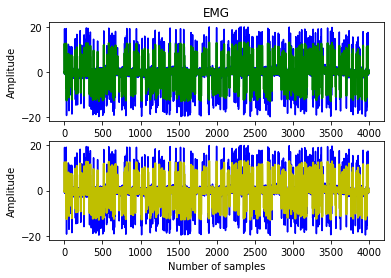

In [30]:
m1=Filter(Filter.signal,Filter.order,Filter.Wn,Filter.Wn1)  #creating an object of Filter class
#calling the methods using the instance of the class
m1.description()   
m1.filtering()